# OWCsim-Py: Geometry-Models

authors: ardimasp

In [1]:
# Print timestamp
import datetime
now = datetime.datetime.now()

print("date:{}".format(now))

date:2019-05-14 01:13:05.280050


## Introduction

In this notebook, some necessary models are discussed. The models include LED, PD, room and human.

## Libraries

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from owcsimpy.geoutils.draw import draw
from owcsimpy.geoobjects.models.pointsource_py import PointSource_py as PointSource
from owcsimpy.geoobjects.models.baredetector_py import BareDetector_py as BareDetector
from owcsimpy.geoobjects.models.roomcube_py import RoomCube_py as Room
from owcsimpy.geoobjects.models.humancube_py import HumanCube_py as Human




## LED (Point Source)

An LED is modeled as a point source with a Lambertian radiation. Geometrically, we need only a vector-like object. A point source is defined by its polar and azimuth angles as well as its location and its Lambertian mode, $m$.

<IPython.core.display.Javascript object>


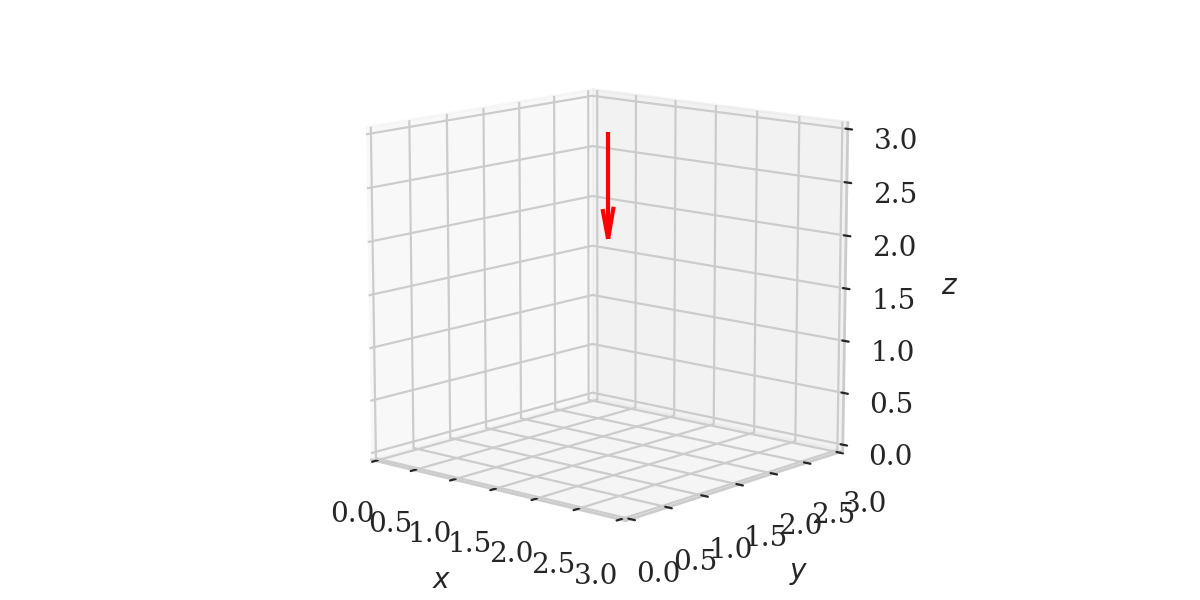

In [4]:
# Let's make a facing-downward LED
polar = np.pi
azimuth = 0
loc = np.array([1.5,1.5,3])
m = 1

# Construct a point source model
led = PointSource(polar,azimuth,loc,m=1)

draw(vectors=led,xlim=[0,3],ylim=[0,3],zlim=[0,3],
    figsize=(6,3),azim=-49,elev=12);


For now, there's no interesting primitives for a point source other than the ability to extract information from a point source object, e.g., location, orientation and its Lambertian mode.

## PD (Bare Detector)

A PD will be simply modeled as a bare detector.  A bare detector is contructed based on a polar angle, an azimuth angle, its location and area and FoV. 

<IPython.core.display.Javascript object>


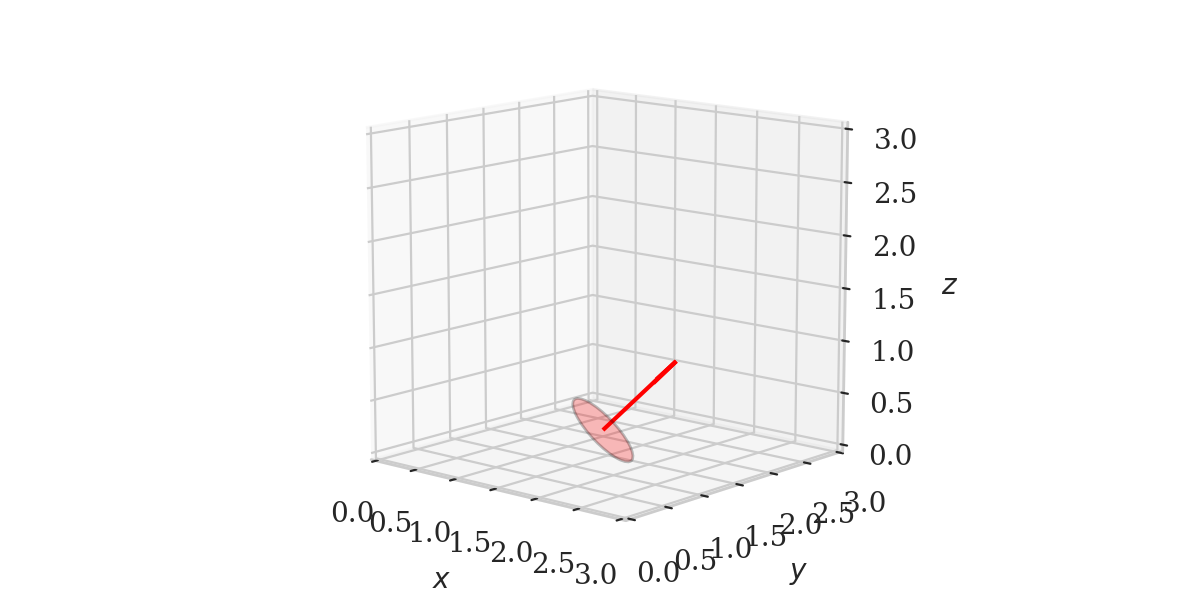

In [5]:
# Parameters
polar = np.deg2rad(45)
azimuth = np.deg2rad(30)
loc = np.array([1,2,0])
area = 1e-4
FoV = np.pi/2

pd = BareDetector(polar,azimuth,loc,
                  area=area,FoV=FoV)

# Draw, scale is used for visualization purposes only as 
# a bare detector is in the order of 1 cm2
draw(circles=pd,scales=5e3,xlim=[0,3],ylim=[0,3],zlim=[0,3],
    figsize=(6,3),azim=-49,elev=12);



## Room (Cube)

A room can be simply modeled as a cube. However, given that we have the rectangular plane and cube models, it is straighforward to design a more compicated room. 

This object is defined based on its dimensions are assumed to occupy positive space of the 3D space, i.e., $x \geq 0$, $y \geq 0$ and $z \geq 0$. The dimensions of a room are denoted by its length, $L$, width, $W$, and height, $H$. The identities of the walls are labeled as 

- 'b' (bottom/floor: $xy$-plane qith $z=0$),
- 't' (top/ceiling: $xy$-plane qith $z=H$),
- 's' (south: $yz$-plane with $x=0$),
- 'n' (north: $yz$-plane with $x=L$),
- 'e' (east: $xz$-plane with $y=0$), and
- 'w' (west: $xz$-plane with $y=W$).

<br>

<figure class="image">
  <img src="./figs/room.png" style="width: 400px;">
  <figcaption>
      <br><center>Fig. 1. A room model.</center></figcaption>
</figure>

<br>


<IPython.core.display.Javascript object>


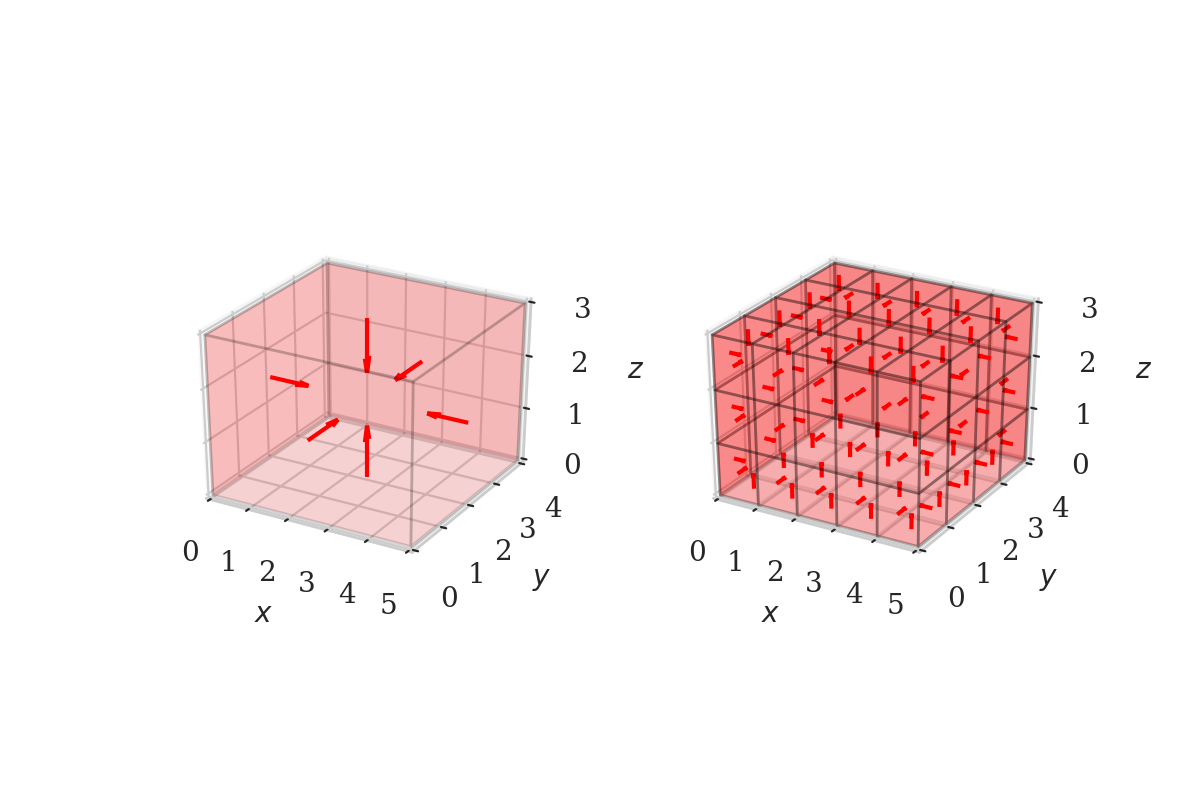

In [6]:
# Reflectivities
rho_keys = ['b','t','s','n','e','w']
rho_vals = [0.1,0.5,0.5,0.5,0.5,0.5]
reflectivities = {rho_keys[i]:rho_vals[i] for i in range(len(rho_keys))}

room = Room(dimensions=[5,4,3],identity=1,reflectivities=reflectivities)

fig,axs = draw(subplots=True,nrows=1,ncols=2,figsize=(6,4),
    xlim=[0,5],ylim=[0,4],zlim=[0,3]);

# Partition with the delta of 1 m
subplanes = room.getPartition(delta=1)

fig,axs[0]=draw(figure=fig,axes=axs[0],models3d=room);
fig,axs[1]=draw(figure=fig,axes=axs[1],planes=subplanes,xlim=[0,5],ylim=[0,4],zlim=[0,3],
     alphas=[0.5*plane.reflectivity for plane in subplanes],
    lengths=0.3);

## Human (Cube)

Similar to the room object, a human can also be simply modeled as a cube with certain constraints. For example, the cube must lie on the $xy$-plane with $z=0$. Another assumption we can impose to the model is that the faces can be categorized into two based on the reflectivity, i.e., 'shirt' and 'hair' faces. The 'hair' face refers to the top face. In addition, this object is defined based on its location and direction, which is azimuth angle.

<IPython.core.display.Javascript object>


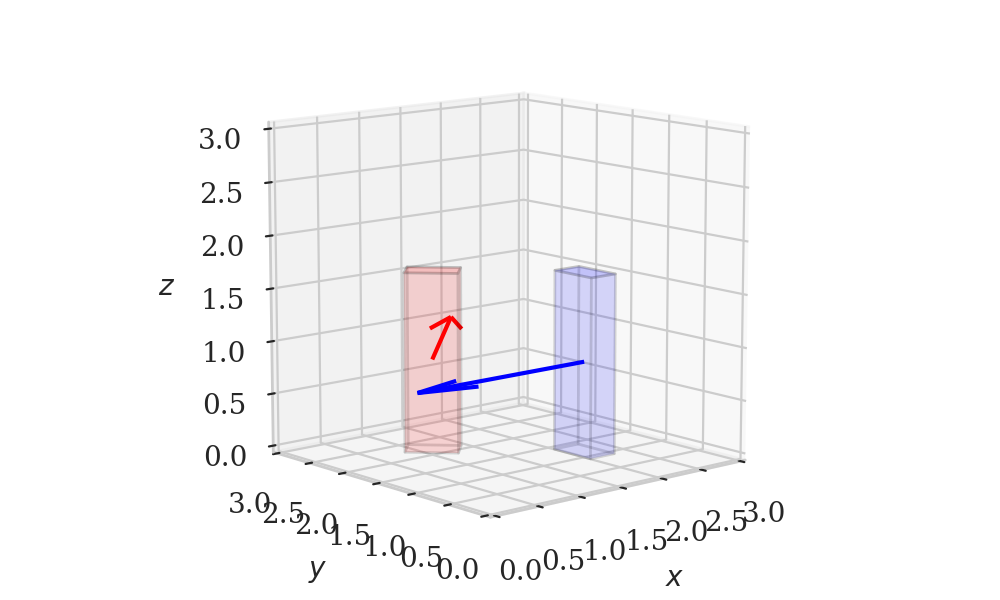

In [7]:
# Define reflectivities
rho_keys = ['shirt','hair']
rho_vals = [0.3,0.6]
reflectivities = {rho_keys[i]:rho_vals[i] for i in range(2)}

# Construct two persons
persons = []
persons.append(Human(
    direction=np.deg2rad(45),
    loc=np.array([1,2]),
    dimensions=[0.3,0.5,1.7],
    identity=2,
    reflectivities=reflectivities))
persons.append(Human(
    direction=np.deg2rad(180),
    loc=np.array([2,1]),
    dimensions=[0.3,0.5,1.7],
    identity=2,
    reflectivities=reflectivities))
draw(models3d=persons,xlim=[0,3],ylim=[0,3],zlim=[0,3],
    facecolors=['red','blue'],colors=['red','blue'],
    azim=-131,elev=11);



## Human (Cubes)

Now, let's construct a more complicated object, say a more detailed human model. Let's make an object depicted below.

<br>

<figure class="image">
  <img src="./figs/human.png" style="width: 200px;">
  <figcaption>
      <br><center>Fig. 2. A more complex human model.</center></figcaption>
</figure>

<br>

We need three cubes. The snippet of the object class would be something like following.

<IPython.core.display.Javascript object>


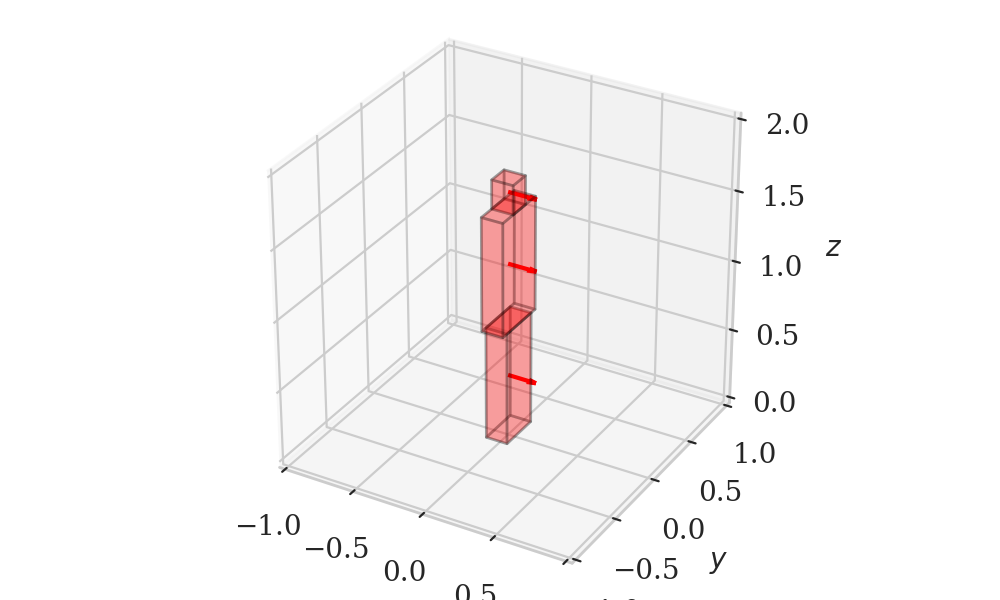

In [8]:
from owcsimpy.geoobjects.bases.vector_py import Vector_py as Vector
from owcsimpy.geoobjects.bases.cube_py import Cube_py as Cube

head = Cube(
    Vector(np.array([1,np.deg2rad(90),np.deg2rad(0)])),
    ctrPoint = np.array([0,0,1.7]),
    dimensions = [0.2,0.15,0.15],
)

body = Cube(
    Vector(np.array([1,np.deg2rad(90),np.deg2rad(0)])),
    ctrPoint = np.array([0,0,1.2]),
    dimensions = [0.8,0.4,0.15],
)

legs = Cube(
    Vector(np.array([1,np.deg2rad(90),np.deg2rad(0)])),
    ctrPoint = np.array([0,0,0.4]),
    dimensions = [0.8,0.3,0.15],
)

draw(cubes=[head,body,legs],alphas=0.2,
     xlim=[-1,1],ylim=[-1,1],zlim=[0,2],
     lengths=0.1,enablevect='False'
             );

A naive implementation of the above model is summarized in `HumanCubes_py` class as following.

<IPython.core.display.Javascript object>


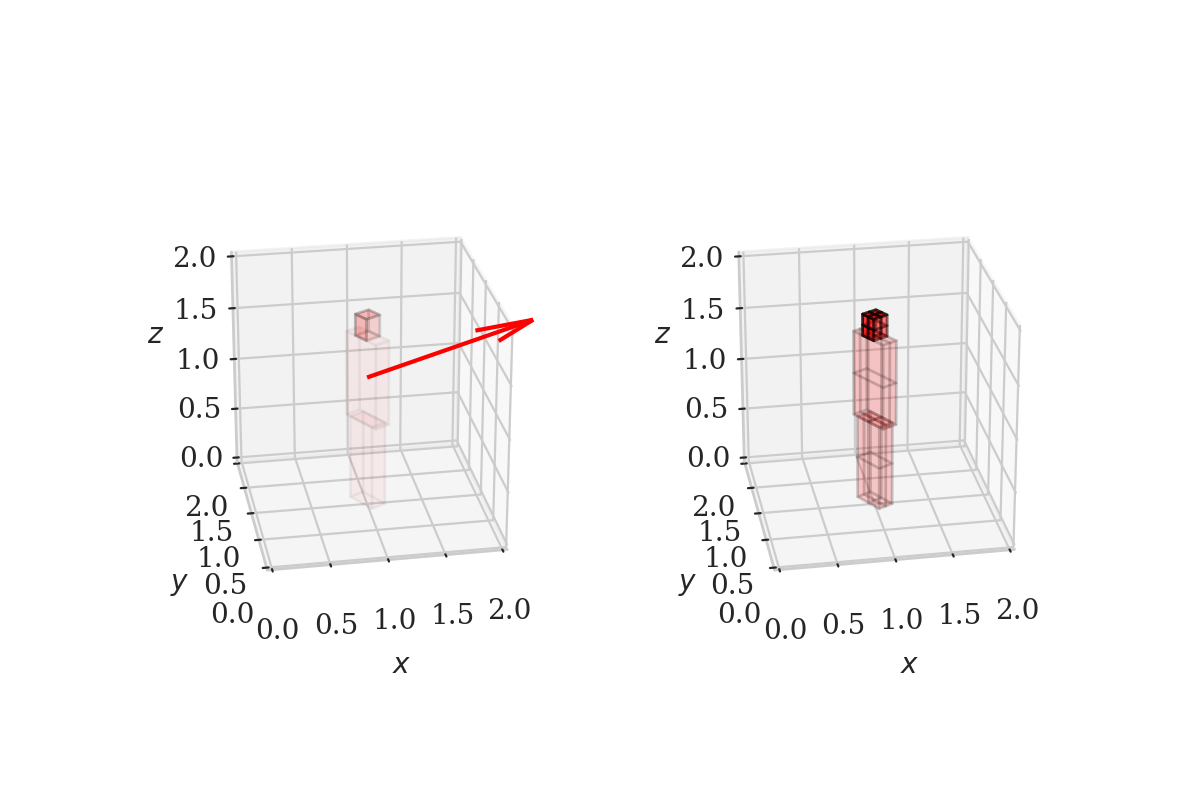

In [9]:
from owcsimpy.geoobjects.models.humancubes_py import HumanCubes_py

person = HumanCubes_py(np.array([1,1]),np.deg2rad(30),
                       reflectivities={'hair':0.7,'face':0.3,'shirt':0.1})

# Verify the reflectivities
planes = person.getPartition(Ps=2)

fig,axs = draw(subplots=True,nrows=1,ncols=2,figsize=(6,4),
               azim=-100,elev=25,xlim=[0,2],ylim=[0,2],zlim=[0,2])

draw(figure=fig,axes=axs[0],models3d=person);
draw(figure=fig,axes=axs[1],planes=planes,
     alphas=[plane.reflectivity for plane in planes],lengths=1e-5);
